# 생선 분류작업(도미와 빙어)

In [1]:
# import 영역

# 샘플데이터 섞기
import random

# 그래프 
import matplotlib as mpl 
import matplotlib.pyplot as plt

# 사용할 알고리즘 : 사이킷런 K-NN(K-Nearest Neighbors, K-최근접이웃)
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 대상 샘플 데이터 도미
bleam_length = [33.0, 29.7, 35.0, 25.4, 30.0, 34.0, 32.0, 31.0, 29.0, 38.5, 36.0, 34.5, 33.5, 30.7, 41.0, 26.3, 32.0, 35.0, 37.0, 29.0, 31.5, 41.0, 33.0, 26.5, 29.7, 35.0, 32.0, 34.0, 38.5, 36.0, 39.5, 35.0, 31.0, 33.5, 30.0]
bleam_weight = [700.0, 450.0, 680.0, 242.0, 450.0, 575.0, 600.0, 500.0, 363.0, 920.0, 714.0, 620.0, 650.0, 500.0, 975.0, 290.0, 600.0, 700.0, 1000.0, 430.0, 500.0, 950.0, 700.0, 340.0, 500.0, 725.0, 340.0, 685.0, 955.0, 850.0, 925.0, 720.0, 475.0, 610.0, 390.0]

# 대상 샘플 데이터 빙어
smelt_length = [11.8, 12.4, 10.6, 14.3, 12.0, 9.8, 13.0, 11.2, 10.5, 11.3, 12.2, 11.8, 11.0, 15.0]
smelt_weight = [10.0, 13.4, 7.0, 19.7, 9.8, 6.7, 12.2, 9.8, 7.5, 8.7, 12.2, 9.9, 9.7, 19.9]

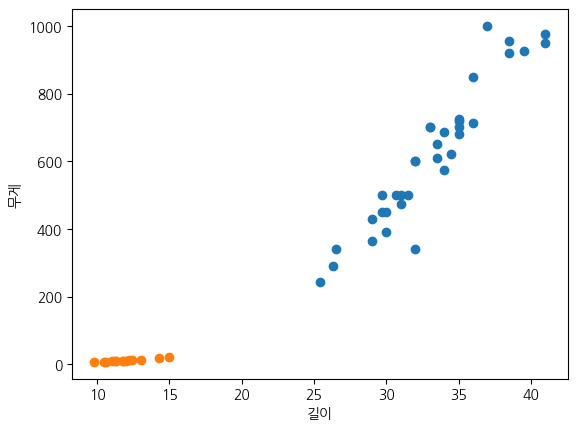

In [3]:
# 그래프 

# 한글 폰트 문제로 나눔고딕 추가
mpl.rcParams['font.family'] = 'Nanum Gothic'

# 좌표 찍기
plt.scatter(bleam_length, bleam_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [4]:
# 사이킷런이 요구하는 데이터 방식인 한쌍의 데이터(2중 리스트) 로 변경
# length, weight 각각의 데이터 합치기 
fish_zip_length = bleam_length + smelt_length
fish_zip_weight = bleam_weight + smelt_weight
print(f'{fish_zip_length}')
print(f'{fish_zip_weight}')

[33.0, 29.7, 35.0, 25.4, 30.0, 34.0, 32.0, 31.0, 29.0, 38.5, 36.0, 34.5, 33.5, 30.7, 41.0, 26.3, 32.0, 35.0, 37.0, 29.0, 31.5, 41.0, 33.0, 26.5, 29.7, 35.0, 32.0, 34.0, 38.5, 36.0, 39.5, 35.0, 31.0, 33.5, 30.0, 11.8, 12.4, 10.6, 14.3, 12.0, 9.8, 13.0, 11.2, 10.5, 11.3, 12.2, 11.8, 11.0, 15.0]
[700.0, 450.0, 680.0, 242.0, 450.0, 575.0, 600.0, 500.0, 363.0, 920.0, 714.0, 620.0, 650.0, 500.0, 975.0, 290.0, 600.0, 700.0, 1000.0, 430.0, 500.0, 950.0, 700.0, 340.0, 500.0, 725.0, 340.0, 685.0, 955.0, 850.0, 925.0, 720.0, 475.0, 610.0, 390.0, 10.0, 13.4, 7.0, 19.7, 9.8, 6.7, 12.2, 9.8, 7.5, 8.7, 12.2, 9.9, 9.7, 19.9]


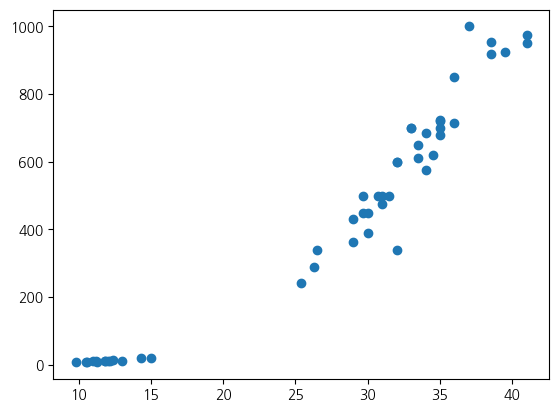

[1] 길이 : 36.0, 무게 : 850.0
[2] 길이 : 30.0, 무게 : 450.0
[3] 길이 : 11.0, 무게 : 9.7
[4] 길이 : 34.0, 무게 : 575.0
[5] 길이 : 32.0, 무게 : 340.0
[6] 길이 : 29.7, 무게 : 450.0
[7] 길이 : 34.0, 무게 : 685.0
[8] 길이 : 31.0, 무게 : 475.0
[9] 길이 : 29.7, 무게 : 500.0
[10] 길이 : 33.5, 무게 : 610.0
[11] 길이 : 29.0, 무게 : 430.0
[12] 길이 : 12.4, 무게 : 13.4
[13] 길이 : 26.3, 무게 : 290.0
[14] 길이 : 12.2, 무게 : 12.2
[15] 길이 : 35.0, 무게 : 700.0
[16] 길이 : 31.5, 무게 : 500.0
[17] 길이 : 9.8, 무게 : 6.7
[18] 길이 : 34.5, 무게 : 620.0
[19] 길이 : 26.5, 무게 : 340.0
[20] 길이 : 33.0, 무게 : 700.0
[21] 길이 : 41.0, 무게 : 950.0
[22] 길이 : 35.0, 무게 : 720.0
[23] 길이 : 36.0, 무게 : 714.0
[24] 길이 : 33.5, 무게 : 650.0
[25] 길이 : 15.0, 무게 : 19.9
[26] 길이 : 12.0, 무게 : 9.8
[27] 길이 : 11.8, 무게 : 10.0
[28] 길이 : 37.0, 무게 : 1000.0
[29] 길이 : 32.0, 무게 : 600.0
[30] 길이 : 30.7, 무게 : 500.0
[31] 길이 : 32.0, 무게 : 600.0
[32] 길이 : 38.5, 무게 : 955.0
[33] 길이 : 14.3, 무게 : 19.7
[34] 길이 : 10.6, 무게 : 7.0
[35] 길이 : 25.4, 무게 : 242.0
[36] 길이 : 11.2, 무게 : 9.8
[37] 길이 : 11.3, 무게 : 8.7
[38] 길이 : 13.0, 무게 : 12.2
[

In [ ]:
# 테스트를 위해 샘플 섞기
# 1. 튜플로 변환 경합
combined = list(zip(fish_zip_length, fish_zip_weight))

# 2. 섞어주기
random.seed(31) # 랜덤코드 31번
random.shuffle(combined)

# 3. 셔플된 데이터 분리 (튜플형식으로 렌덤으로 섞인 데이터를 언패킹해서 분리 combined)
shuffle_length, shuffle_weight = zip(*combined)

# 4. 각각의 데이터 리스트로 변환
fish_length = list(shuffle_length)
fish_weight = list(shuffle_weight)

# 그래프 좌표 찍기
plt.scatter(fish_length, fish_weight)
plt.show()

# 쌍이 맞는지 출력
for i in range(len(fish_length)) :
    print(f'[{i + 1}] 길이 : {fish_length[i]}, 무게 : {fish_weight[i]}')


In [6]:
# 샘플 데이터 훈련을 위한 타겟 예측값 설정
fish_target = [1 if i >= 24 else 0 for i in fish_length]
print(fish_target)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


In [7]:
# 사이킷런에서 요구하는 데이터 타입으로 변환(한쌍의 데이터 형식(2차원 리스트형식))
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
print(fish_data)

[[36.0, 850.0], [30.0, 450.0], [11.0, 9.7], [34.0, 575.0], [32.0, 340.0], [29.7, 450.0], [34.0, 685.0], [31.0, 475.0], [29.7, 500.0], [33.5, 610.0], [29.0, 430.0], [12.4, 13.4], [26.3, 290.0], [12.2, 12.2], [35.0, 700.0], [31.5, 500.0], [9.8, 6.7], [34.5, 620.0], [26.5, 340.0], [33.0, 700.0], [41.0, 950.0], [35.0, 720.0], [36.0, 714.0], [33.5, 650.0], [15.0, 19.9], [12.0, 9.8], [11.8, 10.0], [37.0, 1000.0], [32.0, 600.0], [30.7, 500.0], [32.0, 600.0], [38.5, 955.0], [14.3, 19.7], [10.6, 7.0], [25.4, 242.0], [11.2, 9.8], [11.3, 8.7], [13.0, 12.2], [41.0, 975.0], [30.0, 390.0], [11.8, 9.9], [29.0, 363.0], [35.0, 680.0], [10.5, 7.5], [38.5, 920.0], [35.0, 725.0], [31.0, 500.0], [39.5, 925.0], [33.0, 700.0]]


In [8]:
# # K-NN 상속
# print(f'이웃 참조 가능 갯수 : {len(fish_data)}')
# kn = KNeighborsClassifier(n_neighbors=len(fish_data))
kn = KNeighborsClassifier()

# 훈련 시작
kn.fit(fish_data, fish_target)

# 훈련 정확도
kn.score(fish_data, fish_target)

1.0

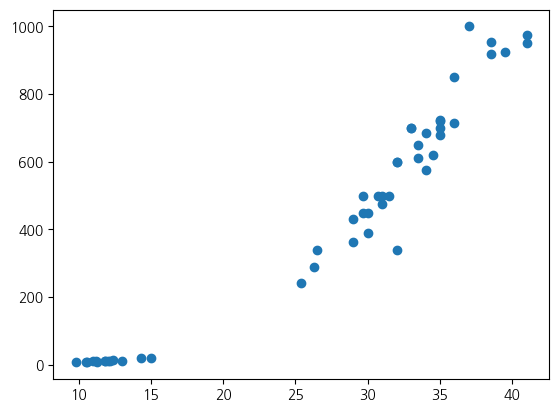

[0] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 36.0cm, 무게 : 850.0g

[1] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 30.0cm, 무게 : 450.0g

[2] 도미일 확율 : 0.00%, 빙어일 확율 : 100.00%
어종 : 빙어, 길이 : 11.0cm, 무게 : 9.7g

[3] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 34.0cm, 무게 : 575.0g

[4] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 32.0cm, 무게 : 340.0g

[5] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 29.7cm, 무게 : 450.0g

[6] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 34.0cm, 무게 : 685.0g

[7] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 31.0cm, 무게 : 475.0g

[8] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 29.7cm, 무게 : 500.0g

[9] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 33.5cm, 무게 : 610.0g

[10] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 29.0cm, 무게 : 430.0g

[11] 도미일 확율 : 0.00%, 빙어일 확율 : 100.00%
어종 : 빙어, 길이 : 12.4cm, 무게 : 13.4g

[12] 도미일 확율 : 100.00%, 빙어일 확율 : 0.00%
어종 : 도미, 길이 : 26.3cm, 무게 : 290.0g

[13] 도미일 확율 : 0.00%, 빙어일 확율 : 100.00%
어종 : 빙어, 길이 : 12.2cm, 무게 :

In [9]:
# 각 샘플 데이터의 샘플데이터값과 예측값 표시

# 샘플 대입
pred = kn.predict(fish_data)

# 각 샘플의 예측 값을 얻기위해 대입
prob = kn.predict_proba(fish_data)

# 전체 생선에대한 샘플 데이터 길이와 무게
plt.scatter(fish_length, fish_weight)
plt.show()

for i in range(len(prob)) :
    # prob[i][?] : ? ==> 1 긍정 예측값, 0 부정 예측값
    print(f'[{i}] 도미일 확율 : {(prob[i][1] * 100):.2f}%, 빙어일 확율 : {(prob[i][0] * 100):.2f}%')
    
    #
    fish_name = '도미' if prob[i][1] >= 0.7 else '빙어'
    print(f'어종 : {fish_name}, 길이 : {fish_data[i][0]}cm, 무게 : {fish_data[i][1]}g\n')